In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py 

In [2]:
dfb = pd.read_csv('c:/crs/proj/2022_runup/beaches.csv', index_col=0, header=0).T
dfb

name,HoM,PeaIs,MadB
wx,BOX,MHX,TBW
site_ID,1572,6024,3665
record,125,289,62
sl_lon,289.921,284.522,277.198
sl_lat,42.0511,35.6713,27.8008
toe,6.3,3.34,1.34
crest,17.0,5.88,2.16
slope,0.1027,0.086,0.0493
95_up,0.1532,0.1363,0.0787
95_low,0.0522,0.0358,0.0199


In [3]:
dfb['HoM']['slope']

0.1027

In [4]:
df_hom = pd.read_csv('c:/crs/proj/2022_runup/hom_stats.csv', delim_whitespace=True, index_col=0, header=0).T
df_hom

var,H_s,T_p,Dir,Dir_scaled,H0L0,Iribarren,WL,subtidal,tides,runup,runup95,TWL,TWL95
mean,0.969,6.08,22.6,21.1,79.0,0.992,-0.0278,-0.0278,-0.000145,0.696,0.973,0.669,0.945
std,0.606,1.95,46.7,43.8,69.9,0.274,0.8450,0.0941,0.829000,0.378,0.528,0.923,0.993
5,0.323,3.21,44.8,39.1,16.4,0.639,-1.2900,-0.1830,-1.230000,0.247,0.346,-0.743,-0.571
16,0.454,4.08,43.4,36.2,26.1,0.729,-1.0000,-0.1050,-0.960000,0.359,0.502,-0.370,-0.148
50,0.812,5.92,19.8,22.2,58.5,0.948,-0.0218,-0.0258,0.005960,0.613,0.857,0.683,0.955
85,1.520,8.16,57.7,63.6,133.0,1.270,0.9560,0.0505,0.973000,1.050,1.470,1.670,1.980
95,2.110,9.52,45.4,52.5,210.0,1.500,1.2400,0.1200,1.240000,1.420,1.990,2.120,2.560
99,3.100,11.20,45.5,48.8,349.0,1.820,1.5000,0.2320,1.480000,1.940,2.720,2.690,3.340


In [5]:
df_hom['T_p']['mean']

6.08

In [6]:
# Range of runup values for median wave conditions
Hs = [df_hom['H_s']['5'],df_hom['H_s']['50'],df_hom['H_s']['95']]
Tp = np.array((df_hom['T_p']['5'],df_hom['T_p']['50'],df_hom['T_p']['95']))
Lo = calc_L0(Tp)

print(func_list)

slopes = [dfb['HoM']['95_low'],dfb['HoM']['slope'],dfb['HoM']['95_up']]

['A17', 'D20', 'H86', 'NH91', 'P14', 'R01', 'S06', 'S11', 'V12']


In [7]:
R2_slopes = np.empty((len(func_list),3))

for j, sl in enumerate( slopes ):       
    for i, item in enumerate( func_list):
        cmd = "R2_slopes[i][j]={}({}, {}, {})".format(item, Hs[1], Lo[1], sl)
        #print(cmd)
        exec(cmd)

print(R2_slopes)

[[0.34446888 0.67771942 1.01096996]
 [1.00275036 0.74068157 0.69614721]
 [0.45119714 0.73058901 1.00998087]
 [0.66547095 0.68343867 1.0195015 ]
 [0.56905737 0.92632633 1.23543414]
 [0.41119072 0.57675753 0.70442934]
 [0.39661222 0.62150426 0.8683672 ]
 [0.67161896 0.67161896 0.67161896]
 [0.20899674 0.41118708 0.61337741]]


In [8]:
R2_hs = np.empty((len(func_list),3))

for j, hsj in enumerate( Hs ):       
    for i, item in enumerate( func_list):
        cmd = "R2_hs[i][j]={}({}, {}, {})".format(item, hsj, Lo[1], slopes[1])
        #print(cmd)
        exec(cmd)

print(R2_hs)

[[0.42743805 0.67771942 1.09247911]
 [0.46714832 0.74068157 1.19397368]
 [0.42295715 0.73058901 1.33791683]
 [0.43104518 0.68343867 1.10169851]
 [0.51349683 0.92632633 1.7068247 ]
 [0.36376133 0.57675753 0.92972924]
 [0.39198311 0.62150426 1.00186066]
 [0.27495977 0.67161896 1.47215291]
 [0.24807029 0.41118708 0.71054681]]


In [9]:
R2_tp = np.empty((len(func_list),3))

for j, loj in enumerate( Lo ):       
    for i, item in enumerate( func_list):
        cmd = "R2_tp[i][j]={}({}, {}, {})".format(item, Hs[1], loj, slopes[1])
        #print(cmd)
        exec(cmd)

print(R2_tp)

[[0.36747962 0.67771942 1.08984609]
 [0.40161957 0.74068157 1.19109605]
 [0.47048897 0.73058901 1.07610935]
 [0.37058077 0.68343867 1.09904327]
 [0.59617808 0.92632633 1.30410026]
 [0.31273508 0.57675753 0.92748847]
 [0.33699809 0.62150426 0.99944604]
 [0.67161896 0.67161896 0.67161896]
 [0.2450991  0.41118708 0.63182055]]


In [10]:
dang = Hs = np.array([df_hom['Dir_scaled']['5'],df_hom['Dir_scaled']['50'],dfb['HoM']['d_n'],df_hom['Dir_scaled']['95']])-dfb['HoM']['d_n']
print(dang)
dfb['HoM']['d_n']

[ 7.1 -9.8  0.  20.5]


32

Text(0.5, 0, 'Slope')

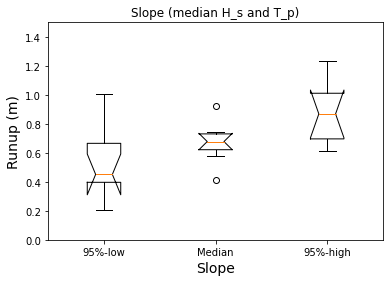

In [12]:
plt.title('Slope (median H_s and T_p)')
plt.boxplot(R2_slopes, notch=True)
plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
['95%-low','Median','95%-high']
plt.xticks([1,2,3], ['95%-low','Median','95%-high'])
plt.xlabel('Slope',fontsize=14)

Text(0.5, 0, 'H_s')

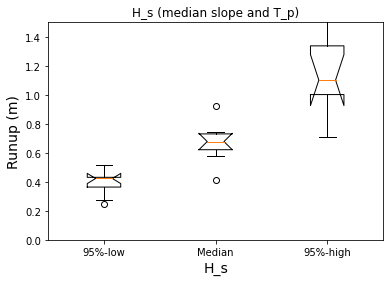

In [13]:
plt.title('H_s (median slope and T_p)')
plt.boxplot(R2_hs, notch=True)
plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
['95%-low','Median','95%-high']
plt.xticks([1,2,3], ['95%-low','Median','95%-high'])
plt.xlabel('H_s',fontsize=14)

Text(0.5, 0, 'T_p')

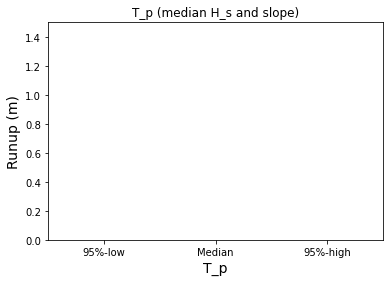

In [14]:
plt.title('T_p (median H_s and slope)')
plt.boxplot(R2_tp, notch=True)
plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
['95%-low','Median','95%-high']
plt.xticks([1,2,3], ['95%-low','Median','95%-high'])
plt.xlabel('T_p',fontsize=14)